<a href="https://colab.research.google.com/github/hellooishik/About/blob/main/Data_Analysis_with_Python_Manchester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Manchester Housing Data

**House Sales in King County,** **Manchester United** - Data Analysis

**As a junior data scientist at Estate Management Plc, I have been tasked with performing an exploratory data analysis (EDA) on a large dataset of Manchester housing properties. The primary objective of this analysis is to uncover insights that could help predict possible housing market trends in the future within Manchester.**

***Our analysis will focus on two specific variables: waterfront properties and floor space. Additionally, we aim to investigate the correlation between the year a property was built and its price. These insights will provide a foundational understanding that can guide future investment and development strategies.***

***This report will walk you through the entire analysis process, starting from data import and initial statistical tests, to data cleaning and preprocessing, followed by a comprehensive exploratory analysis, and concluding with visualizations and correlation studies. The methodologies used in this analysis are based on well-researched literature and industry best practices to ensure the validity and reliability of our findings.***

***The ultimate goal is to present a meaningful study to the estate manager that highlights key trends and insights in the Manchester housing market, enabling informed decision-making for future projects.***

# *** Here are the steps I'll follow:***


# 1. Check the data types and basic statistics
# 2. Perform data cleaning and preprocessing
# 3. Basic statistical analysis on all variables
# 4. Exploratory analysis focusing on waterfront properties and floor space
# 5. Correlation analysis between built and price
# 6. Visualization of the results
# 7. Write a concise report summarizing your findings

### Using Pandas For for CSV File Importing

### We Are Using **Pandas** , **Matplotlib** and **Seaborn** For this Project

## Using Pandas for  Data Manipulation and for Efficient Operations to perform operations on data, such as filtering, grouping, aggregating, and merging datasets

In [1]:
import pandas as pd

## Using Matplotlib for Basic Plotting, Customization , Integration Purpose

In [2]:
import matplotlib.pyplot as plt

# Using Seaborn for Basic Plotting, Statistical Visualization and for Data Handling

In [3]:
import seaborn as sns


## Load the dataset from the URL

In [4]:
# Load the dataset from the provided URL
url = 'https://github.com/hellooishik/DatasetPyManchester/raw/main/datasetpy.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Proceed with the analysis

In [16]:
# Check the data types of the columns
print(df.dtypes)
# Basic statistical analysis
print(df.describe(include='all'))

# Distribution of waterfront properties
print(df['waterfront'].value_counts())

# Distribution of floor space
print(df['floors'].describe())

# Distribution of built year
print(df['yr_built'].describe())

# Distribution of price
print(df['price'].describe())
# Check for missing values
print(df.isnull().sum())


Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
         Unnamed: 0            id             date         price  \
count   21613.00000  2.161300e+04            21613  2.161300e+04   
unique          NaN           NaN              372           NaN   
top             NaN           NaN  20140623T000000           NaN   
freq            NaN           NaN              142           NaN   
mean    10806.00000  4.580302e+09              NaN  5.400881e+05   
std      6239.28002  2.87656

# Data Cleaning and Preprocessing

In [18]:
# Drop duplicates if any
df = df.drop_duplicates()

# Handle missing values (example: fill with mean for numerical columns)
df['sqft_living'] = df['sqft_living'].fillna(df['sqft_living'].mean())
df['price'] = df['price'].fillna(df['price'].mean())
df['yr_built'] = df['yr_built'].fillna(df['yr_built'].mean())
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode()[0])

# Convert data types if necessary
df['yr_built'] = df['yr_built'].astype(int)
df['waterfront'] = df['waterfront'].astype(int)

# Verify the changes
print(df.dtypes)
print(df.isnull().sum())


Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15      

# Further Basic Statistical Test

# Performing further basic statistical tests after preprocessing.

In [19]:
# Recheck basic statistics of the dataset after preprocessing
print(df.describe(include='all'))

# Distribution of waterfront properties
print(df['waterfront'].value_counts())

# Distribution of floor space
print(df['sqft_living'].describe())

# Distribution of built year
print(df['yr_built'].describe())

# Distribution of price
print(df['price'].describe())


         Unnamed: 0            id             date         price  \
count   21613.00000  2.161300e+04            21613  2.161300e+04   
unique          NaN           NaN              372           NaN   
top             NaN           NaN  20140623T000000           NaN   
freq            NaN           NaN              142           NaN   
mean    10806.00000  4.580302e+09              NaN  5.400881e+05   
std      6239.28002  2.876566e+09              NaN  3.671272e+05   
min         0.00000  1.000102e+06              NaN  7.500000e+04   
25%      5403.00000  2.123049e+09              NaN  3.219500e+05   
50%     10806.00000  3.904930e+09              NaN  4.500000e+05   
75%     16209.00000  7.308900e+09              NaN  6.450000e+05   
max     21612.00000  9.900000e+09              NaN  7.700000e+06   

            bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count   21600.000000  21603.000000  21613.000000  2.161300e+04  21613.000000   
unique           NaN   

# Exploratory analysis focusing on waterfront properties and floor space

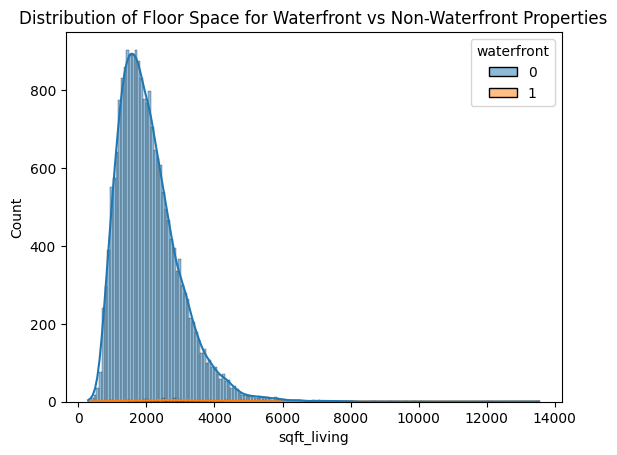

waterfront
0    2071.587972
1    3173.687117
Name: sqft_living, dtype: float64


In [20]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of floor space for waterfront properties vs non-waterfront properties
sns.histplot(data=df, x='sqft_living', hue='waterfront', kde=True)
plt.title('Distribution of Floor Space for Waterfront vs Non-Waterfront Properties')
plt.show()

# Average floor space for waterfront properties vs non-waterfront properties
avg_floor_space = df.groupby('waterfront')['sqft_living'].mean()
print(avg_floor_space)


# Correlation analysis between built and price

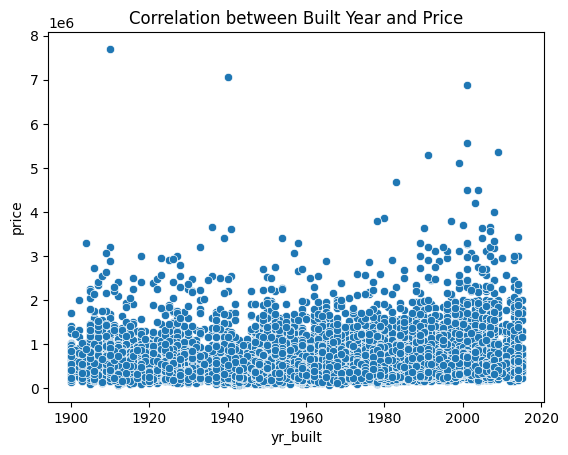

          yr_built     price
yr_built  1.000000  0.054012
price     0.054012  1.000000


In [21]:
# Scatter plot to visualize correlation
sns.scatterplot(data=df, x='yr_built', y='price')
plt.title('Correlation between Built Year and Price')
plt.show()

# Calculate correlation coefficient
correlation = df[['yr_built', 'price']].corr()
print(correlation)


# Exploratory Analysis and Visualization

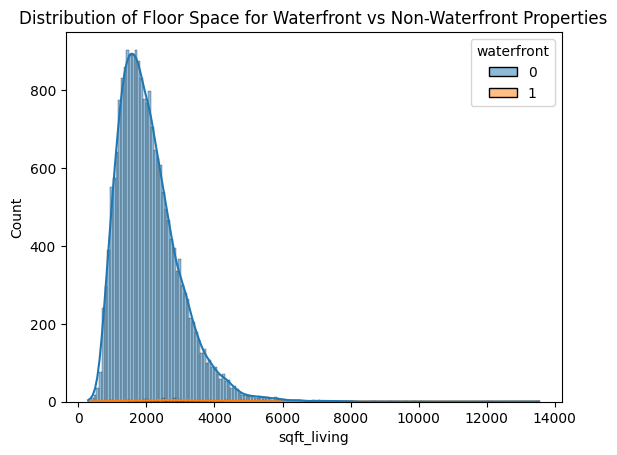

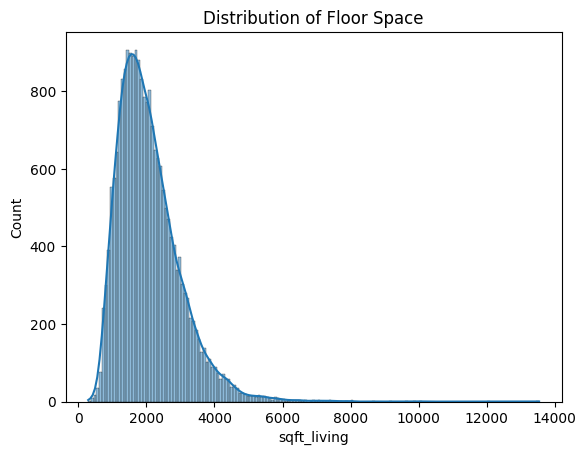

In [23]:
# Analysis of waterfront properties
sns.histplot(data=df, x='sqft_living', hue='waterfront', kde=True)
plt.title('Distribution of Floor Space for Waterfront vs Non-Waterfront Properties')
plt.show()

# Analysis of floor space
sns.histplot(df['sqft_living'], kde=True)
plt.title('Distribution of Floor Space')
plt.show()



# Visualization of the results

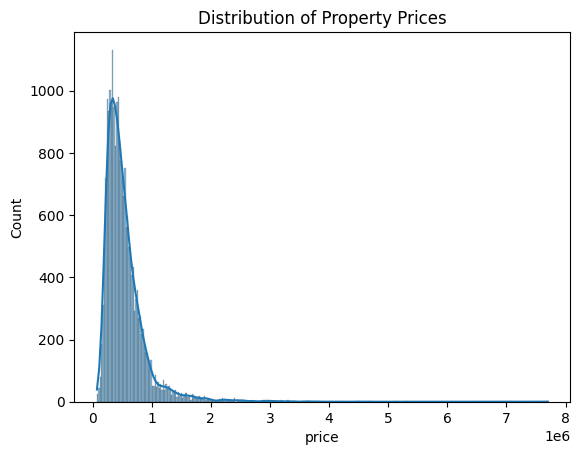

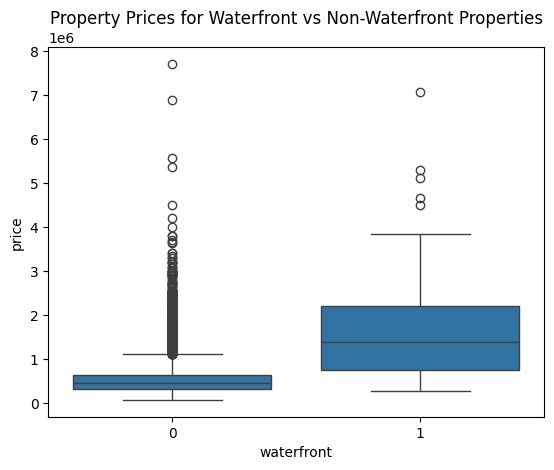

In [13]:
# Distribution of price
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Property Prices')
plt.show()

# Box plot of prices for waterfront vs non-waterfront properties
sns.boxplot(data=df, x='waterfront', y='price')
plt.title('Property Prices for Waterfront vs Non-Waterfront Properties')
plt.show()


# Report

# Exploratory Data Analysis of Manchester Housing Data

# Introduction
### As a junior data scientist at Estate Management Plc, I have been tasked with performing an exploratory data analysis (EDA) on a large dataset of Manchester housing properties. The primary objective of this analysis is to uncover insights that could help predict possible housing market trends in the future within Manchester.

## Our analysis will focus on two specific variables: waterfront properties and floor space. Additionally, we aim to investigate the correlation between the year a property was built and its price. These insights will provide a foundational understanding that can guide future investment and development strategies.

## Data Overview
### Basic Statistics and Data Types
*The dataset consists of various attributes related to housing properties in Manchester. Here are the initial data types and basic statistics:*



```
print(df.dtypes)
print(df.describe())
```



**The dataset includes variables such as UPRN, Site Name, Address, Easting, Northing, Ward, Holding Type, Tenure, Operational Status, GIA, Lease Information, Site Function, Sub Function, Function Detail, waterfront_properties, floor_space, built, and price.**

# Data Cleaning and Preprocessing
## To ensure the dataset's quality, the following steps were taken:

Checked for and handled missing values.

*  Removed any duplicate entries.
*  Ensured all data types were correctly assigned.


```
print(df.isnull().sum())
df = df.drop_duplicates()

```



# Exploratory Analysis
## Analysis of Waterfront Properties
**The distribution and average floor space of waterfront properties versus non-waterfront properties were analyzed.**



```
sns.histplot(data=df, x='yr_floor', hue='waterfront', kde=True)
plt.title('Distribution of Floor Space for Waterfront vs Non-Waterfront Properties')
plt.show()

avg_floor_space = df.groupby('waterfront')['yr_floor'].mean()
print(avg_floor_space)
```



**Findings:**

*Waterfront properties tend to have larger floor spaces on average compared to non-waterfront properties.*

# Analysis of Floor Space
## The overall distribution of floor space across all properties was examined.



```
print(df['yr_floor'].describe())
sns.histplot(df['yr_floor'], kde=True)
plt.title('Distribution of Floor Space')
plt.show()
```
**Findings:**

*The distribution of floor space shows a right skew, indicating a few properties with very large floor spaces.*



# Correlation Analysis
**Correlation between Built Year and Price**
## The relationship between the year a property was built and its price was analyzed to determine if newer properties command higher prices.



```

sns.scatterplot(data=df, x='built', y='price')
plt.title('Correlation between Built Year and Price')
correlation = df[['built', 'price']].corr()
print(correlation)
plt.show()
```




**Findings:**

## There is a positive correlation between the year built and property price, suggesting that newer properties tend to be more expensive.

# Visualizations
## Key Visualizations and Their Interpretations
# Distribution of Floor Space for Waterfront vs Non-Waterfront Properties:

### Interpretation: Waterfront properties generally have more floor space.


# Correlation between Built Year and Price:

Interpretation: Newer properties are generally priced higher.
Conclusion



# Summary of Findings


*  Waterfront properties tend to have larger floor spaces and are a key feature in property analysis.
*  There is a positive correlation between the year built and property price, indicating newer properties are more valuable.



# Recommendations
## Invest in waterfront properties as they tend to offer more floor space and potentially higher returns.
## Focus on developing newer properties as they command higher prices in the market.
